In [164]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Parameters

In [165]:
X = np.array(
    [[1129, 1.435],
     [1453, 1.501],
     [1656, 1.654],
     [1787, 1.803],
     [1999, 1.934]]
)
y = [1.56, 1.64, 1.77, 1.83, 2.5]

X_test = np.array(
    [[1629, 1.635],
     [1853, 1.701],
     [1356, 1.454]]
)

n_iter = 3
lr = 0.001

In [166]:
X_to_print = pd.DataFrame(X, columns = ['x_1','x_2'])
print(f'The original data (i.e., matrix X):')
X_to_print

The original data (i.e., matrix X):


,x_1,x_2
0,1129.0,1.435
1,1453.0,1.501
2,1656.0,1.654
3,1787.0,1.803
4,1999.0,1.934


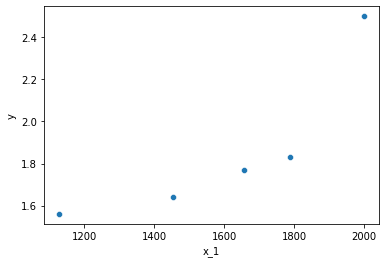

In [167]:
X_to_plot = X_to_print.copy()
X_to_plot["y"] = y
sns.scatterplot(data=X_to_plot, x="x_1", y="y");

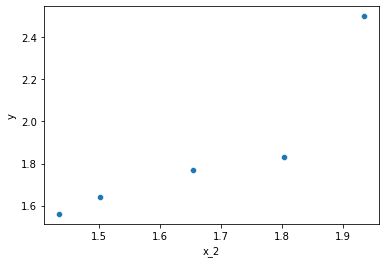

In [168]:
sns.scatterplot(data=X_to_plot, x="x_2", y="y");

# Standardize the continuous initial variables

In [169]:
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
X_std_to_print = pd.DataFrame(X_std, columns = ['x_1_std','x_2_std'])
print(f'The standardised data (i.e., matrix X_std):')
print(f'x_1_std mean = {X_std_to_print["x_1_std"].mean():.2f}')
print(f'x_1_std std = {X_std_to_print["x_1_std"].std():.2f}')
print(f'x_2_std mean = {X_std_to_print["x_2_std"].mean():.2f}')
print(f'x_2_std std = {X_std_to_print["x_2_std"].std():.2f}')
X_std_to_print

The standardised data (i.e., matrix X_std):
x_1_std mean = 0.00
x_1_std std = 1.00
x_2_std mean = -0.00
x_2_std std = 1.00


,x_1_std,x_2_std
0,-1.433547,-1.113286
1,-0.457361,-0.794376
2,0.154262,-0.055084
3,0.548954,0.664879
4,1.187693,1.297868


In [170]:
X_train_mean = np.mean(X, axis=0)
print(f'X_train_mean: \n{X_train_mean} \n')
X_train_std = np.std(X, axis=0, ddof=1)
print(f'X_train_std: \n{X_train_std} \n')

X_train_mean: 
[1604.8       1.6654] 

X_train_std: 
[3.31903902e+02 2.06954826e-01] 



# Standardize Y

In [171]:
y_train_mean = np.mean(y)
print(f'y_train_mean: \n{y_train_mean} \n')
y_train_std = np.std(y)
print(f'y_train_std: \n{y_train_std} \n')
y = [(a - y_train_mean)/y_train_std for a in y]
print(f'STD y: \n{y} \n')

y_train_mean: 
1.86 

y_train_std: 
0.3337663853655727 

STD y: 
[-0.8988322765679699, -0.6591436694831784, -0.26964968297039116, -0.08988322765679706, 1.9175088566783351] 



# Compute coefficients

In [172]:
# add the w_0 intercept where the corresponding x_0 = 1
Xp = np.concatenate([np.zeros((X_std.shape[0], 1)), X_std], axis=1)
print(f'X: \n{Xp}\n')
print(f'XT: \n{Xp.T}\n')
print(f'Y: \n{y}\n')

m = Xp.shape[0]  # sample size
print(f'Sample size: {m}\n')

hist = np.zeros(n_iter)
# get coefficients
beta = np.zeros(Xp.shape[1])
for i in range(n_iter):
    print(f'Iteration #{i}:')
    y_hat = np.exp(np.dot(Xp, beta))
    print(f'Current linear prediction {np.dot(Xp, beta)}')
    print(f'Current prediction {y_hat}')
    dLdbeta = np.dot(Xp.T, y_hat - y) / m

    loss = (y_hat - np.log(y_hat) * y).mean()
    print(f'Current loss: {loss}')
    hist[i] = loss

    print(f'Current residuals {y_hat - y}')
    print(f'Current derivatives {dLdbeta}')
    beta -= lr*dLdbeta
    print(f'Current coefficients {beta}')
    print(f'-'*10)

print(f'beta: \n{beta} \n')

X: 
[[ 0.         -1.43354747 -1.11328643]
 [ 0.         -0.4573613  -0.79437626]
 [ 0.          0.15426152 -0.05508448]
 [ 0.          0.54895408  0.6648794 ]
 [ 0.          1.18769318  1.29786778]]

XT: 
[[ 0.          0.          0.          0.          0.        ]
 [-1.43354747 -0.4573613   0.15426152  0.54895408  1.18769318]
 [-1.11328643 -0.79437626 -0.05508448  0.6648794   1.29786778]]

Y: 
[-0.8988322765679699, -0.6591436694831784, -0.26964968297039116, -0.08988322765679706, 1.9175088566783351]

Sample size: 5

Iteration #0:
Current linear prediction [0. 0. 0. 0. 0.]
Current prediction [1. 1. 1. 1. 1.]
Current loss: 1.0
Current residuals [ 1.89883228  1.65914367  1.26964968  1.08988323 -0.91750886]
Current derivatives [ 0.         -0.75529188 -0.79360617]
Current coefficients [0.         0.00075529 0.00079361]
----------
Iteration #1:
Current linear prediction [-1.96625774e-03 -9.75863171e-04  7.27970857e-05  9.42272946e-04
  1.92705088e-03]
Current prediction [0.99803567 0.999

# Visualization (the learning phase)

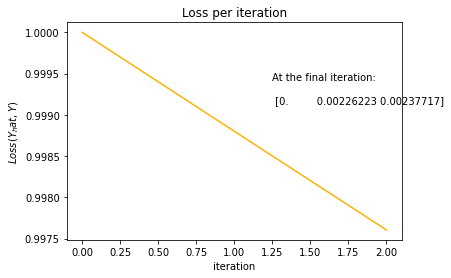

In [173]:
plt.plot(hist, 'b', color='#fcb103')
plt.title(u'Loss per iteration')
plt.xlabel(u'iteration')
plt.ylabel(r'$Loss(Y_hat, Y)$')
plt.figtext(x=.6, y=.6, s=f"At the final iteration:\n\n {beta}")
plt.show()

# Predict (test set)

In [174]:
print(f'X_test: \n{X_test} \n')

X_test_std = (X_test - X_train_mean) / X_train_std
print(f'STD X_test: \n{X_test_std} \n')

Xp_test = np.concatenate([np.zeros((X_test_std.shape[0], 1)), X_test_std], axis=1)
print(f'Adding zeros STD X_test: \n{Xp_test} \n')

y_pred = Xp_test.dot(beta.T)
print(f'y_pred: \n{y_pred} \n')

print(f'y_pred restandertaization: \n{y_pred*y_train_std+y_train_mean} \n')

X_test: 
[[1.629e+03 1.635e+00]
 [1.853e+03 1.701e+00]
 [1.356e+03 1.454e+00]] 

STD X_test: 
[[ 0.07291267 -0.14689196]
 [ 0.74780682  0.17201822]
 [-0.74961457 -1.02147896]] 

Adding zeros STD X_test: 
[[ 0.          0.07291267 -0.14689196]
 [ 0.          0.74780682  0.17201822]
 [ 0.         -0.74961457 -1.02147896]] 

y_pred: 
[-0.00018424  0.00210063 -0.00412403] 

y_pred restandertaization: 
[1.85993851 1.86070112 1.85862354] 



# Test 1
Source: https://dafriedman97.github.io/mlbook/content/c2/s2/GLMs.html

In [175]:
class PoissonRegression:
    
    def fit(self, X, y, n_iter = 1000, lr = 0.00001):
        zeros = np.zeros(len(X)).reshape((len(X), 1))
        X = np.append(zeros, X, axis = 1)
        self.X = X
        self.y = y
        
        # get coefficients
        beta_hats = np.zeros(X.shape[1])
        for i in range(n_iter):
            y_hat = np.exp(np.dot(X, beta_hats))
            dLdbeta = np.dot(X.T, y_hat - y) / X.shape[0]
            beta_hats -= lr*dLdbeta

        # save coefficients and fitted values
        self.beta_hats = beta_hats
        self.y_hat = y_hat
            

In [176]:
model = PoissonRegression()
model.fit(X_std, y, n_iter = 3, lr = 0.001)
model.beta_hats

array([0.        , 0.00226223, 0.00237717])

# Test 2
Source: https://github.com/ximenasandoval/Poisson_regression/blob/main/Poisson%20regression%20model.ipynb


In [177]:
def loss(x, y, w, b):
    y_hat = np.exp(x @ w + b)
    # You can use the normal MSE error too! 
    #error = np.square(y_hat - y).mean() / 2
    error = (y_hat - np.log(y_hat) * y).mean()
    return error

def grad(x, y, w, b):
    M, n = x.shape
    y_hat = np.exp(x @ w + b)
    dw = (x.T @ (y_hat - y)) / M
    db = (y_hat - y).mean()
    return dw, db

def gradient_descent(x, y, w_0, b_0, alpha, num_iter):
    w, b = w_0.copy(), b_0
    hist = np.zeros(num_iter)
    M, n = x.shape
    
    for iter in range(num_iter):
        dw, db = grad(x, y, w, b)
        w -= alpha * dw 
        # b -= alpha * db
        hist[iter] = loss(x, y, w, b)

    return w, b, hist

w, b, hist = gradient_descent(x=X_std, y=y, w_0=np.zeros((X_std.shape[1], )), b_0=0, alpha=lr, num_iter=n_iter)

In [178]:
b, w

(0, array([0.00226223, 0.00237717]))

In [179]:
print(f'beta: \n{beta} \n')
print(f'test 1 beta: \n{model.beta_hats} \n')
print(f'test 2 beta: \n{b} {w} \n')

beta: 
[0.         0.00226223 0.00237717] 

test 1 beta: 
[0.         0.00226223 0.00237717] 

test 2 beta: 
0 [0.00226223 0.00237717] 

